<a href="https://colab.research.google.com/github/M-A-Lopa/CIFAR10/blob/main/Cifar_10_using_CNN_without_padding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras import datasets, layers, models
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# **Preprocessing : Scaling**

In [ ]:
y_train[:5]
#9 is ankle boot
#o is t-shirt/Top
#3 is dress

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train, y_test is 2d so we convert it into 1d using reshape

In [ ]:
y_train = y_train.reshape(-1,)

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train[0:5]#descrete value not categorical or scaled value

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
#we can also write y_test = y_test.reshape(10000,) instead the prev one
#10000 is row of y_test
#-1 lets NumPy automatically calculate the appropriate dimension when dont know the dim for Id

In [ ]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

# **Data Visualaization**


Cross checking with our y_train outputs with plot images --> whether they are correct or not

In [ ]:
def plot_sample(index):
    plt.figure(figsize = (12,1))
    plt.imshow(x_train[index])

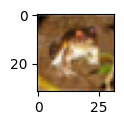

In [ ]:
plot_sample(0)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

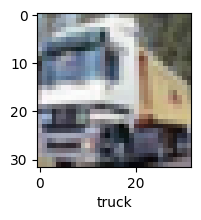

In [ ]:
plot_sample(x_train, y_train, 1)#y_train --> output

# **Normalizing the training data**


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# **Building MLP NN**

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),#imput layer --> using flatten to convert 2d array into 1d
        keras.layers.Dense(3000, activation='relu'),#2 ta hidden layer
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')  #output layer
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
#used categorical not descret y_train
#so use categorical_crossentropy instead of sparse categorical
#Multi-class classification (integers)	--> 'SGD' or 'adam'	---> 'sparse_categorical_crossentropy'
#Multi-class classification (one-hot) ---> 	'SGD' or 'adam'	---> 'categorical_crossentropy'
#Binary classification	---> 'SGD' or 'adam'	---> 'binary_crossentropy'


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3001 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4214 - loss: 1.6434
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4524 - loss: 1.5545
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4779 - loss: 1.4866
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4982 - loss: 1.4344


We have imported from tensorflow.keras import datasets, layers, models previously, so we use this version of model also which is less repititive. However, both versions are similar will work fine.

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

# **Model evaluation --> Prcision, recall, f1-score**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.30      0.44      1000
           1       0.50      0.76      0.60      1000
           2       0.34      0.41      0.37      1000
           3       0.33      0.34      0.33      1000
           4       0.50      0.24      0.33      1000
           5       0.46      0.30      0.37      1000
           6       0.37      0.80      0.50      1000
           7       0.76      0.30      0.43      1000
           8       0.57      0.68      0.62      1000
           9       0.53      0.52      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



# **CNN Model**

In [ ]:
#No padding
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(x_train, y_train, epochs=10)

#32 pixels high
#32 pixels wide
#3 color channels (RGB)

#Input Image (32x32x3)
       # ↓
#Conv2D (3x3, 32 filters) → output: 30x30x32   ---> formula: Output height or width =(Input size−Kernel size)+1
       # ↓
#MaxPooling (2x2) → output: 15x15x32 --> 15x15 = (30x30) / 2
        #↓
#Conv2D (3x3, 64 filters) → output: 13x13x64 -->for formula--> input will be same for all conv2d --> height = 32, width = 32
       # ↓
#MaxPooling (2x2) → output: 6x6x64 --> 6x6 = (15x15) / 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3782 - loss: 1.6917
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5944 - loss: 1.1524
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6609 - loss: 0.9780
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6942 - loss: 0.8822
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7208 - loss: 0.8052
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7398 - loss: 0.7527
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7607 - loss: 0.6855
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7778 - loss: 0.6396
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7961 - loss: 0.5913
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8031 - loss: 0.5582


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7058 - loss: 0.9295


[0.9493783116340637, 0.7021999955177307]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[6.7435199e-01, 1.7808850e-03, 4.5853842e-02, 1.9926006e-01,
        1.1237692e-03, 3.8709313e-02, 5.3371782e-03, 7.5123890e-04,
        3.2688648e-02, 1.4312114e-04],
       [2.5397685e-04, 1.0757380e-02, 1.6799448e-06, 6.6775868e-07,
        1.1419456e-08, 1.5240717e-07, 1.7496921e-08, 6.0532246e-09,
        9.8797590e-01, 1.0101489e-03],
       [2.6695915e-02, 2.5899589e-01, 1.0197607e-03, 3.7036259e-03,
        1.1031469e-02, 5.1778357e-04, 2.2724865e-04, 1.1689556e-03,
        6.7789495e-01, 1.8744359e-02],
       [9.1491950e-01, 9.1982086e-04, 2.1614719e-03, 3.4968660e-03,
        1.5135396e-03, 2.2102243e-04, 2.2031860e-05, 1.2717203e-05,
        7.6723933e-02, 8.9168170e-06],
       [1.8576772e-07, 7.0023120e-06, 6.0866788e-02, 6.6792421e-02,
        1.1502159e-01, 5.5859494e-03, 7.5147748e-01, 7.0823568e-05,
        1.7515851e-04, 2.6063099e-06]], dtype=float32)